Files already downloaded and verified
Files already downloaded and verified
Epoch 1 / 20, Loss: 0.9769036821126937
Epoch 2 / 20, Loss: 0.9498011358380317
Epoch 3 / 20, Loss: 0.9360737816691399
Epoch 4 / 20, Loss: 0.9275267511606217
Epoch 5 / 20, Loss: 0.9215921345949173
Epoch 6 / 20, Loss: 0.9171911337971688
Epoch 7 / 20, Loss: 0.9137790152430534
Epoch 8 / 20, Loss: 0.9110532827973365
Epoch 9 / 20, Loss: 0.9088249573707581
Epoch 10 / 20, Loss: 0.9069731140732765
Epoch 11 / 20, Loss: 0.9054130397439003
Epoch 12 / 20, Loss: 0.9040863399505615
Epoch 13 / 20, Loss: 0.9029478748440742
Epoch 14 / 20, Loss: 0.9019648159742355
Epoch 15 / 20, Loss: 0.9011113119125366
Epoch 16 / 20, Loss: 0.90036654150486
Epoch 17 / 20, Loss: 0.8997140563130379
Epoch 18 / 20, Loss: 0.8991407369375228
Epoch 19 / 20, Loss: 0.8986354401707649
Epoch 20 / 20, Loss: 0.8981890431046486


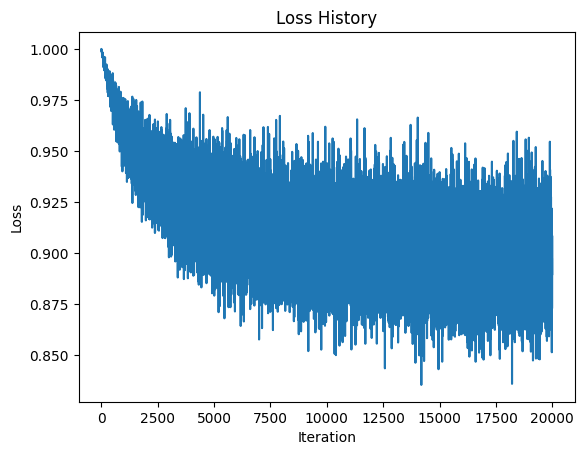

Training accuracy: 32.22%
Test accuracy: 32.41%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1} / {iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


#### 1. Add a middle layer with 100 nodes and a sigmoid activation.
#### 2. Use cross-entropy loss

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.8404
Epoch 2/10, Loss: 1.6906
Epoch 3/10, Loss: 1.6268
Epoch 4/10, Loss: 1.5747
Epoch 5/10, Loss: 1.5297
Epoch 6/10, Loss: 1.4901
Epoch 7/10, Loss: 1.4510
Epoch 8/10, Loss: 1.4164
Epoch 9/10, Loss: 1.3829
Epoch 10/10, Loss: 1.3530


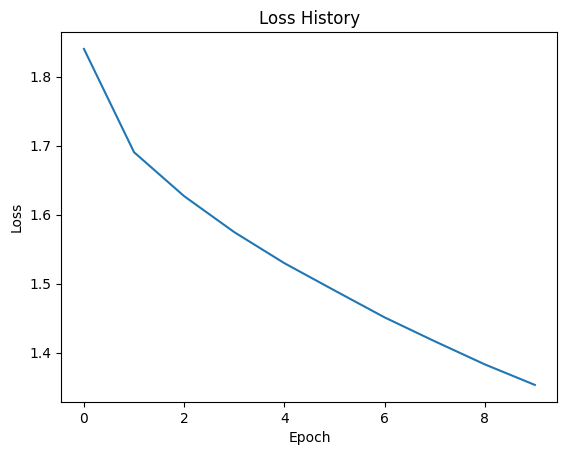

Training accuracy: 54.85%
Test accuracy: 48.26%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the Network with a Hidden Layer and sigmoid Activation
class SimpleNN(nn.Module):
    def __init__(self, Din, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(Din, hidden_size)  # Hidden layer
        self.sigmoid = nn.Sigmoid()  # sigmoid activation
        self.output = nn.Linear(hidden_size, output_size)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)  # Apply sigmoid activation
        x = self.output(x)
        return x

# Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
output_size = 10  # Output size (number of classes in CIFAR-10)
hidden_size = 100  # Number of hidden neurons

# Initialize model
model = SimpleNN(Din, hidden_size, output_size)

# 3. Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 4. Training Loop
iterations = 10
loss_history = []

for epoch in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.view(inputs.size(0), -1), labels  # Flatten and move to device

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Loss calculation
        loss = criterion(outputs, labels)
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()
    
    average_loss = running_loss / len(trainloader)
    loss_history.append(average_loss)
    print(f"Epoch {epoch+1}/{iterations}, Loss: {average_loss:.4f}")

# 5. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 6. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.view(inputs.size(0), -1), labels

        outputs = model(inputs)
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.view(inputs.size(0), -1), labels

        outputs = model(inputs)
        _, predicted_test = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


#### Using ReLU instead of Sigmoid

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the Network with a Hidden Layer and ReLU Activation
class SimpleNN(nn.Module):
    def __init__(self, Din, hidden_size, K):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(Din, hidden_size)  # Hidden layer
        self.relu = nn.ReLU()  # ReLU activation
        self.output = nn.Linear(hidden_size, K)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)  # Apply ReLU activation
        x = self.output(x)
        return x

# Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
hidden_size = 256  # Number of hidden neurons

# Initialize model
model = SimpleNN(Din, hidden_size, K)

# 3. Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 4. Training Loop
iterations = 20
for epoch in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        Ntr = inputs.shape[0]
        inputs = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Loss calculation
        loss = criterion(outputs, labels)
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{iterations}, Loss: {running_loss / len(trainloader)}")

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        inputs = inputs.view(Ntr, -1)

        outputs = model(inputs)
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        inputs = inputs.view(Nte, -1)

        outputs = model(inputs)
        _, predicted_test = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 1.8505934133529662
Epoch 2/20, Loss: 1.6324020923376084
Epoch 3/20, Loss: 1.5489626513719559
Epoch 4/20, Loss: 1.4927508689165114
Epoch 5/20, Loss: 1.4460143647193908
Epoch 6/20, Loss: 1.4042333569526673
Epoch 7/20, Loss: 1.3663739029169082
Epoch 8/20, Loss: 1.3314320796728134
Epoch 9/20, Loss: 1.3000210462212562
Epoch 10/20, Loss: 1.2712731520533562
Epoch 11/20, Loss: 1.2439497639536858
Epoch 12/20, Loss: 1.2182964578270912
Epoch 13/20, Loss: 1.1918518104553222
Epoch 14/20, Loss: 1.1680515592694283
Epoch 15/20, Loss: 1.1464091185331344
Epoch 16/20, Loss: 1.1229477977156639
Epoch 17/20, Loss: 1.1007843652963638
Epoch 18/20, Loss: 1.0795412949323655
Epoch 19/20, Loss: 1.0602040937542916
Epoch 20/20, Loss: 1.038653848350048
Training accuracy: 67.14%
Test accuracy: 53.78%
